# 실험 환경 설정

안정적인 실험 환경을 조성하기 위해, 과제를 진행하는 과정에서는 가상 환경을 생성하였습니다.  
    
python -m venv venv (<= 실행하여 가상환경 생성)  
.\venv\Scripts\activate (<= 가상환경 활성화)

사용한 python 버젼은 3.9.13이며, OpenAI gym과의 호환성을 고려하여 하위버젼에서는 충돌이 발생할 수 있습니다.

<br>

다운로드 해야 하는 Module을 requirements.txt에 기록하였으며, 필요할 경우 아래 command를 통해 다운로드 받을 수 있습니다.
pip install -r requirements.txt
 
하지만 requirements.txt를 이용할 경우 다운로드가 정상적으로 이루어지지 않는 경우가 종종 있어,  
다음과 같이 manual하게 다운로드 받습니다.  

In [1]:
# %pip install -r requirements.txt

%pip install gym
%pip install gymnasium
%pip install numpy
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



# OpenAI Gym CartPole을 활용한 Q-Learning  
  
본 ipynb 파일은 OpenAI가 제공하는 강화학습용 오픈소스 라이브러리 gym, 그 중에서도 CartPole Game을 사용하여  
Agent가 CartPole을 최대한 오랫동안 버티도록 만드는 것을 목적으로 합니다.  
사용한 학습 방식은 ***Q-Learning***입니다.  
  
강화학습의 이론을 설명하기에 앞서, ***OpenAI Gym CartPole***에 대해 설명합니다.
<br>

* OpenAI Gym - ***CartPole***  

<img src="./images/image-1.png" style="width:800px; height:500px;">  
  
CartPole은 Cart를 좌, 또는 우로 움직여서 Cart에 매달린 Pole이 똑바로 서 있도록 만드는 게임입니다.   
CartPole의 자세한 실험 환경은 다음과 같습니다.  
  
* State : St = (x, ẋ, θ, θ˙)  
CartPole에서의 State S는 x, ẋ, θ, θ˙로 구성된다.  

    x  : Cart의 Position,  
    값의 범위 => (-4.8 ~ 4.8)  
    
    ẋ  : Cart의 Velocity  
    값의 범위 => (-inf ~ inf)  
    
    θ  : Pole의 현재 Angle  
    값의 범위 => (-0.418 ~ 0.418)  
    
    θ˙ : Pole의 Angular Velocity  
    값의 범위 => (-inf ~ inf)   
  
* Action Space : CartPole이 특정한 time step t에서 할 수 있는 Action은 LEFT(0) or RIGHT(1)이다.  

* Initial Values : Initial State St를 구성하는 모든 State Values (-0.05, +0.05)의 범위에서 초기값이 Random하게 정해진다.
  
* Terminal Condition
    1) Pole의 Angle이 절댓값 12도보다 커진다.  
    2) Cart의 Position x의 절댓값이 2.4보다 커진다.
    3) 한 Episode에서 time step이 500보다 커지면 종료한다. (CartPole-v1 제약 조건)  
<br>    
* Reward : 한 번의 Episode에서 time step을 한 번 버틸 때마다 Reward를 1씩 받는다.  
이것은 CartPole에서의 목표(Control Object)가, Agent가 최대한 오랫동안 균형을 유지하도록 만드는 것이기 때문이다.  
따라서 Agent가 Episode를 오래 유지할수록 더 높은 Reward를 받게 된다.

  

# 강화학습의 이론 (기본부터 Q-Learning까지)  

강화학습이란, 주어진 환경에서 Agent가 스스로 Action을 수행하면서, 얻을 수 있는 Return의 기댓값을 극대화하는 Policy를 찾는 머신러닝 방법의 일종입니다.  
이 정의의 의미를 이해하고 실험을 진행하기 위해서는 먼저, 강화학습의 토대가 되는 몇 가지 기초 이론을 이해해야만 합니다.  

* **Agent**와 **Environment**    
  
Agent란 주어진 Environment내에서 행동을 수행하는 주체이다.  
Agent가 State St에 위치할 때, Agent는 특정한 Policy에 따라 Action A를 수행한다.  
이 Action은 Environment에 영향을 주어, Agent가 St+1로 transition되도록 만든다.  
이 과정에서 Agent가 St -> St+1에 도달할 때, Reward R을 전달받는다.  
(하단의 이미지에서는 Rt+1로 표현한다.)  

이것이 강화학습의 근간이 되는 기본 동작이다.   

<img src="./images/image-2.png" style="width:500px; height:400px;"> 

* State and State Values  

State St란, Agent의 현재 상태를 말한다.  
CartPole 환경의 경우, Agent의 현재 상태는 네 개의 State Values  
x, ẋ, θ, θ˙로 구성된다.
  
  
* Action and Action Space

Action이란, Agent가 실제로 행하는 행위를 말하며, Agent는 Action에 의해서  
State St에서 State St+1로 Transition된다.  
Action Space란, Agent가 수행할 수 있는 모든 Action의 집합을 말한다.  
CartPole Environment에서는, LEFT, RIGHT만 선택 가능하다.
  
  
* Policy(Control Action)  

<img src="./images/image-4.png" style="width:600px; height:100px;">  

Policy란, State St에서 Action At를 선택할 확률이다.  
즉, 하나의 State St에서 가능한 Action At가 있을 때, St에서 At를 선택할 확률을 의미한다.

* Return

강화학습에서 Return은 다음과 같이 정의된다.  
<img src="./images/image-3.png" style="width:350px; height:100px;">  

State St의 Return을 위와 같이 정의할 수 있으며, 이 때, Rt+1은 St+1에서 얻을 수 있는 Reward를 의미한다.  
여기까지 진행하면 강화학습의 목표를 다시 한 번 생각해 볼 수 있다.  
강화학습의 목표는 얻을 수 있는 Return의 기댓값을 극대화하는 Policy를 찾는 것이다.  
그러므로, 우리가 구하고자 하는 것은 State St에서의 Return의 기댓값이 최대가 되는 Policy를 찾는 것이며,  
한 번의 Simulation에서 Terminal State에 도달하는 과정까지의 Policy Sequence를 구하는 것이다.  
(이 때, Terminal State까지 도달하는 한 번의 과정을 Episode라고 합니다.)
  
이 식에서 time step t가 1씩 증가될 때마다, discount factor gamma를 곱해준다.  
이것은 강화학습의 목적이 Gt의 기댓값을 극대화하는 것이므로 반드시 Gt를 구해야만 하는데,  
만약 Episode가 끝나지 않는다면 Gt는 발산하게 되므로 Gt를 구하지 못하기 때문에 추가한 것이다.  
Episode가 반드시 Finite하게 끝난다면, gamma는 1이어도 된다.  


* State Value Function and Action Value Function  

그런데 우리가 구하고자 하는 것은 정확히는 Gt의 기댓값을 극대화하는 것이다.  
이것을 제대로 표현하면, State Value Function이다.  

<img src="./images/image-5.png" style="width:350px; height:100px;">  

State Value Function의 의미는 State St에서 얻을 수 있는 Gt(Return)의 기댓값이다.  
그러므로 최종적으로, 강화학습의 목표는 State Value Function을 극대화하는 것이라고 볼 수 있다.  
  
<img src="./images/image-6.png" style="width:500px; height:70px;"> 

이와 유사한 Action Value Function(Q)은, State St에서 특정한 Action At를 수행했을 때 얻을 수 있을 것으로  
기대되는 Gt의 기댓값이다.
    
Bellman Equation을 State Value Function에 적용하면, State Value Function은 Action Value Function의 평균으로 볼 수 있다.  
따라서 우리는 Greedy Action을 통해서 매 State마다 Action Value Function이 최대가 되게 하는 Policy를 선택함으로써,  
State Value Function이 최대가 되도록 만들 수 있다.  

이 아이디어가 중심이 되어, Q-Learning에서는 기본적으로 Action Value Function(Q)에 대한 Greedy Action으로 이루어진다.  
다만, 너무 지속해서 Greedy Action만 하면 Agent가 얻을 수 있는 Optimal Policy를 찾지 못할 수도 있다.  
따라서 우리는 Epsilon Greedy라는 것을 도입하여, 평소에는 Greedy하게 Q값을 찾아가다가, 랜덤하게  
Greedy가 아닌 무작위 행동을 하게 만드는 방식을 도입하여 사용한다. 

* Monte Carlo Method for updating Action Value Function

지금까지의 기초 이론을 바탕으로, Monte Carlo Method를 사용하면, Episode를 진행함에 따라
얻어진 값들을 바탕으로 Action Value Function을 새로운 값으로 업데이트 할 수 있다.  
즉, Agent가 Environment를 탐색하면서 각각의 State에 대해 어떠한 Action을 취했을 때 얻을 수 있는 Reward를 학습해 나가는 것이다.  
(Monte Carlo 방식이란, 충분히 많은 반복을 진행하고 나서 얻은 Gt의 합으로부터 그 평균을 구하는 것이 실제 Gt의 기댓값과 거의 같다 것을 의미함.)

<img src="./images/image-8.png" style="width:500px; height:200px;">  

* Temporal Difference using Monte Carlo (Incremental Monte Carlo)  



또한 위의 공식에 약간의 수정을 가하면, Monte Carlo의 아이디어를 수정할 수 있다.  
이전에는 충분히 많은 반복을 진행해야만 Q를 업데이트 할 수 있었는데, Bellman Equation을 활용하여 수정하면  
Agent가 State가 Step을 한 번 건널 때마다 Q를 업데이트 하는 방식으로 수정할 수 있다.  
이 아이디어를 활용하여 진행하는 강화학습 방법이 SARSA이며, 공식은 아래와 같다.

<img src="./images/image-7.png" style="width:500px; height:70px;">  
  
=> SARSA에서 Q값을 업데이트 하는 공식


  
***Q-Learning***  

지금까지의 아이디어를 바탕으로, Q값에 대한 Greedy Action과 Epsilon Greedy를 반복하면서  
Q값을 지속적으로 충분히 업데이트하면, Action Value Function의 값들이 일정 지점에 수렴하게 된다.  
그러므로 우리는 Action Value Function에 대한 Greedy Action을 수행하는 Policy Sequence를 얻어  
Environment에서 강화학습의 목표를 달성할 수 있게 된다.  
 
이 방식의 일종인 SARSA는 On-Policy(Behavior Policy와 Target Policy가 일치함)의 관점에서 진행되는 방법이며,  
지금부터 다루고자 하는 방식인 Q-Learning은 Off-Policy의 관점에서 진행되는 방법이다.  

<img src="./images/image-9.png" style="width:500px; height:100px;">  

Q-Learning은 SARSA의 Q function update와는 약간 차이가 존재하는데, 바로 Action A' (next action)을 고려하지 않고  
Next State S'에서 최대의 Action Value Function 값을 갖는 것을 선택해 값을 update 한다는 것이다.  
즉, State St에서의 Action Value Function을 State Transition에 의한 Reward R과 현재의 Action Value Function, 그리고  
State S'에서의 최대 Action Value Function으로 구하는 것이다. (gamma와 alpha는 상수)  

# Q-Learning For CartPole

CartPole에서의 State는 x, ẋ, θ, θ˙로 구성되며, 각각의 값들은 Continous한 값이다.  
우리의 목적은 Agent가 CartPole을 최대한 오래 유지하도록 학습시키는 것이다.  
이를 강화학습의 의미로 분석해보면, Agent가 초기 State로부터 시작해서 Random한 Action(LEFT, RIGHT)을 취해보면서  
그 때의 Reward가 얼마나 큰 지를 Action Value Function으로 나타내는 것이다.  
이 반복을 충분히 많이 수행하면, 우리가 구한 Action Value Function은 Optimal하다고 가정하고,  
Greedy Action을 수행하며 각 State에서 최대의 값을 갖는 Action Value Function을 따르는 Policy의 Sequenc를  
Action으로 수행하면 Agent는 좋은 결과를 얻게 된다.  

Q-Learning은 State별로 Action Value Function을 기록해야 하기 때문에, 학습 과정에서 메모리를 많이 사용한다.  

<img src="./images/image-10.png" style="width:800px; height:300px;">  

=> Q-Learning의 Action Value Function을 보관하는 Q-Table의 예시.  
CartPole의 경우에는 (x, ẋ, θ, θ˙)에 의해 현재 State가 결정될 것이며,  
이 상태에서 LEFT/RIGHT를 결정하는 역할을 하는 것이 Action Value Function이 될 것이다.  

따라서 본 실습에서는 Q-Learning을 사용하여 Agent가 CartPole을 최대한 오랫동안 유지하도록 학습시키고자 한다.  

* 문제점 : Infinite States  
CartPole 예제에서 Q-Learning을 적용하는 것에는 한 가지 어려움이 존재한다.  
바로, State의 개수가 무한하다는 것이다.  

그 이유는 State를 구성하는 각각의 State Values가 Continous한 값이기 때문에 State가 무한해 진다는 것이다.  
이 문제를 해결하기 위해서, State Value를 Encoding 해야 한다.  
이번 실습에서는 각각의 State Value의 domain을 NumberOfBins라는 수만큼의 segment로 나누어서,  
매칭되는 영역으로 encoding 한다.  
=> 이를 returnIndexState() 메서드로 구현한다.

그리고, 속도와 각속도의 경우 domain이 (-inf, inf)이기 때문에, lowerBoundary와 upperBoundary를 설정하여  
값의 범위를 유한하게 만들어 준다.

In [2]:
import gym # OpenAI gym library
import numpy as np # Numpy
import time 
import matplotlib.pyplot as plt # 결과 plotting을 위한 library

In [3]:
class Q_Learning:
    def __init__(self, env, alpha, gamma, epsilon, numberEpisodes, numberOfBins, lowerBounds, upperBounds):
        self.env=env # 주어진 environment. 여기서는 CartPole 환경이다.

        # alpha는 Q-Learning에서 Q-Table을 업데이트 할 때 현재 값에 좀 더 집중하여 업데이트 할 것인지,
        # 새로운 값에 좀 더 집중하여 업데이트 할 것인지를 결정하는 hyper-parameter이다.
        self.alpha=alpha 

        # gamma는 discount factor이며, David Silver 교수에 따르면 이것을 도입하는 가장 큰 이유는
        # Return의 값을 점차 줄여서 Return이 수렴하도록 만들고, 이를 통해 수학적으로 계산하기 간단하게 만들기 위해서이다.
        # 일반적으로 생명체는 현재의 Reward에 좀 더 집중하고, 미래의 Reward에는 가중치를 적게 부여하는 경향이 있다.
        # Return의 정의를 고려할 때, (Gt = Rt+1 + gamma*Rt+2 + gamma^2*Rt+3 + ... ) discount factor는
        # 이러한 생명체의 행동 양식을 모델링하는 역할이라고도 볼 수 있다. (gamma는 0과 1 사이의 값)
        self.gamma=gamma 

        # epsilon은 Agent가 Exploration을 할 수 있도록 Epsilon-Greedy를 하기 위해 설정하는 값이다.
        # epsilon은 0과 1 사이의 값으로, simulation 과정에서 한 time step에서 뽑은 randomNumber의 값이
        # epsilon보다 작다면 random action을 하고, epsilon보다 크다면 greedy action을 한다.
        self.epsilon=epsilon 

        # 현재 Environment에서 Agent가 취할 수 있는 Action의 수
        self.actionNumber=env.action_space.n 

        # Simulation을 진행하는 Episode의 수
        self.numberEpisodes=numberEpisodes
        
        # Continous한 State value를 구분하기 위한 Bin값.
        # CartPole의 State를 구성하는 Value들은 모두 Continous하기 때문에
        # 이것들을 반드시 Encoding해야만 finite State를 구성할 수 있다.
        # numberOfBins는 각각의 state value의 구간을 나누는 숫자이다.

        # 예를 들어, numberOfBins의 값을 [4, 2, 2, 3]으로 설정했다고 해보자.
        # 그러면 x의 전체 공간을 네 개의 segment로 나눈다는 것이고,
        # x dot은 2개로, theta도 2개로, theta dot은 3개로 나눈다는 것이다.
        self.numberOfBins=numberOfBins
        
        # lowerBounds와 upperBounds는 네 개의 entries를 가진 list이다.
        # 이걸 설정한 이유는, State Value들이 min/max를 가지기 때문이다.
        
        # x의 경우, -4.8 ~ +4.8이라는 범위를 갖기 때문에 bound가 필요하다.
        
        # 그런데, x_dot, theta_dot의 경우는 -inf ~ +inf이다.
        # 이것들은 numerical하게 표현하기 힘들기 때문에, shrink해야 한다.
        
        # theta의 경우, -24 deg ~ +24 deg의 범위를 갖지만,
        # |12| deg를 넘어갈 경우 episode가 종료되기 때문에,
        # bound를 shrink할 수 있다.
        self.lowerBounds=lowerBounds
        self.upperBounds=upperBounds
        
        # 이 리스트는 각 에피소드에서 얻어진 Reward의 Sum을 보관하는 용도이다.
        # Episode를 진행할 때마다 얻어지는 Sum을 기록해서,
        # Iteration을 반복할 때마다 Reward가 Converge하는 것을 보여주는 용도이다.
        self.sumRewardsEpisode = []
        
        # Q-Learning의 핵심이 되는 Q value Table이다.
        # 우리는 각각의 state value를 numberOfBins로 나누어서 state를 구성하였고,
        # 각각의 state에서 할 수 있는 행동은 actionNumber이므로, 
        # 해당 값들로 shape가 구성되는 table을 생성,
        # np.random.uniform을 통해 0과 1사이의 random 값으로 초기화한다.
        self.Qmatrix = np.random.uniform(low=0, high=1, size=(numberOfBins[0], numberOfBins[1], numberOfBins[2], numberOfBins[3], self.actionNumber))
        
    def returnIndexState(self, state):
        '''
            현재 상태를 입력받고, 그것을 discretize한 다음, 구간에 매칭되는 index를 반환하는 역할을 하는 함수.
        '''

        # 현재 State의 state values를 parsing한다.
        # CartPole의 State는 아래 네 개의 요소로 구성된다.
        position = state[0]
        velocity = state[1]
        angle = state[2]
        angularVelocity = state[3]
        
        # 각각에 대해서 정해진 Bin의 숫자만큼, lowerBound~upperBound 내에서 segment를 쪼갠다.
        cartPositionBin = np.linspace(self.lowerBounds[0], self.upperBounds[0], self.numberOfBins[0])
        cartVelocityBin = np.linspace(self.lowerBounds[1], self.upperBounds[1], self.numberOfBins[1])
        poleAngleBin = np.linspace(self.lowerBounds[2], self.upperBounds[2], self.numberOfBins[2])
        poleAngleVelocityBin = np.linspace(self.lowerBounds[3], self.upperBounds[3], self.numberOfBins[3])
        
        # 구간을 나눠서 mapping하는 부분이다.
        # 전달받은 state가 나눠진 segment에서 어떤 부분에 속하는지, 그 index를 전달받는다.
        indexPosition = np.maximum(np.digitize(state[0], cartPositionBin)-1, 0)
        indexVelocity = np.maximum(np.digitize(state[1], cartVelocityBin)-1, 0)
        indexAngle = np.maximum(np.digitize(state[2], poleAngleBin)-1, 0)
        indexAngularVelocity = np.maximum(np.digitize(state[3], poleAngleVelocityBin)-1, 0)
        
        # mapping한 index를 반환한다.
        return tuple([indexPosition, indexVelocity, indexAngle, indexAngularVelocity])
    
    def selectAction(self, state, index):
        '''
            Agent가 수행하는 action을 뽑아내는 함수이다.
            index가 필요한 이유는, episode number에 따라서 control action이 달라지기 때문이다.
            만약 index가 500보다 작다면, 모두 random한 action을 하도록 만들어서 충분한 exploration을 확보한다.
        '''
        
        # 500번 동안에는 Random Action을 해서 충분한 Exploration을 통해
        # Action Value Function을 확보할 수 있도록 한다.
        if index < 500:
            return np.random.choice(self.actionNumber)
        
        # Epsilon-Greedy를 수행하기 위하여 randomNumber를 하나 뽑는다.
        randomNumber = np.random.random()
        
        # 7000번의 에피소드가 지나면, epsilon값을 점차 감소시켜서
        # explorationn을 줄이고 점차 exploitation을 할 수 있도록 만든다.
        # 즉, 에피소드가 진행됨에 따라 구해진 Q 값들이 optimal에 가까워진다고 생각하고
        # 점차 Optimize에 집중하는 것이다.
        if index > 7000:
            self.epsilon = 0.999*self.epsilon
        
        # 뽑은 randomNumber가 epsilon보다 작다면 randomAction을 수행한다.
        if randomNumber < self.epsilon:
            return np.random.choice(self.actionNumber) # random한 Action을 고른다. 여기서는 0 또는 1
        # 그렇지 않다면, Greedy Action을 수행한다.
        else:
            # returnIndexState()를 이용하여 현재 state의 discretized index를 얻어낸다.
            # 그리고 이것을 바탕으로 Qmatrix의 Row에 접근하여, 그 중에서 maximum action value function을 갖는 action을 선택한다.
            # 그런데 만약, 두 action value function의 값이 같다면, 둘 중 하나를 random하게 고른다.
            return np.random.choice(np.where(self.Qmatrix[self.returnIndexState(state)]==np.max(self.Qmatrix[self.returnIndexState(state)]))[0])
        
    def simulateEpisodes(self):
        '''
            실제로 Episode를 simulation하는 부분.
        '''

        # Episode를 반복한다.
        for indexEpisode in range(self.numberEpisodes):
            
            # Episode 별로 구해지는 reward가 converge함을 보이기 위해
            # reward를 저장하는 list.
            rewardsEpisode = []
            
            # 생성한 CartPole 환경을 초기 상태로 Reset하는 부분.
            # reset하면, 모든 State values는 [-0.05, 0.05] 안에서 정해진다.
            # 따라서 CartPole은 매우 작은 Angle로 reset될 것이다.
            (stateS, _) = self.env.reset()
            stateS = list(stateS)
            
            print("Simulating Episode {}".format(indexEpisode))
            
            # CartPole Agent가 어떠한 Action을 수행해서, 현재 State가 Terminal State에 도달했는지
            # 판단하기 위한 Boolean 변수이다.
            terminalState = False
            
            # 한 번의 Episode를 시작하는 부분.
            while not terminalState:
                
                # 가장 먼저, 현재 state의 Qtable Index를 반환받는다.
                # 이 부분의 의미는, State S를 구성하는 State Values를 바탕으로
                # discretize된 State Segment에 매칭되는 index를 구하고,
                # 이를 return하여 현재 State의 index를 알아내는 것이다.
                # => 즉, 현재 Agent가 위치한 State는 어떤 State인지 알아내는 것.
                stateSIndex = self.returnIndexState(stateS)
                
                # State S에서 Agent가 수행할 Action을 선택한다.
                # 500번 이하의 episode에서는 random action을 해서 충분한 exploration을 확보하고,
                # 7000번까지는 epsilon-greedy를 충분히 하다가, 그 이후에는 epsilon을 서서히 감소시킨다.
                actionA = self.selectAction(stateS, indexEpisode)
                
                # 정해진 action(random or greedy)을 바탕으로 action을 진행한다.
                # env.step(actionA)를 진행하면, 현재 State S가 Next State S'으로 Transition된다.
                # 이 과정에 의해 생기는 결과를 전달받는 부분이다. (S', Reward, Terminal State, _, _)
                # _, _은 크게 중요하지 않은 반환값이다.

                # 여기서 stateSprime은 action에 의해 transition된 next state S'이다.
                (stateSprime, reward, terminalState, _, _) = self.env.step(actionA)
                
                # 현재 Episode의 reward를 기록한다.
                rewardsEpisode.append(reward)
                stateSprime = list(stateSprime)
                
                # 새롭게 얻어진 state인 S'의 Qtable Index를 얻어낸다.
                # 마찬가지로, discretize된 segment에서 매핑되는 index를 얻어내는 것이다.
                stateSprimeIndex = self.returnIndexState(stateSprime)
                
                # 구해진 S'의 Index의 Q Table에 접근하여, LEFT, RIGHT 중 어떤 Action Value Function
                # 값들 중에서, 더 큰 값을 가져온다.
                QmaxPrime = np.max(self.Qmatrix[stateSprimeIndex])
                
                # Temporal Difference 공식에서, Off-Policy에 의해 수정된 Q-Learning의 공식을 따라서
                # Action Value Function(Q-Values)을 업데이트한다.
                if not terminalState:
                    error=reward+self.gamma*QmaxPrime-self.Qmatrix[stateSIndex+(actionA,)]
                    self.Qmatrix[stateSIndex+(actionA,)]=self.Qmatrix[stateSIndex+(actionA,)]+self.alpha*error
                else:
                    # Terminal State에서는 Qmatrix[stateSprime,actionAprime]=0 이다. 
                    error=reward-self.Qmatrix[stateSIndex+(actionA,)]
                    self.Qmatrix[stateSIndex+(actionA,)]=self.Qmatrix[stateSIndex+(actionA,)]+self.alpha*error
                
                # next_state를 current_state로 교체한다.
                stateS = stateSprime
            
            # Reward의 Convergence를 확인하기 위하여, sumRewardsEpisode에
            # Reward의 총합을 추가.
            print("Sum of reward {}".format(np.sum(rewardsEpisode)))
            self.sumRewardsEpisode.append(np.sum(rewardsEpisode))
    
    # 구해진 Policy들을 바탕으로 CartPole을 Simulation 한다.
    def simulateLearnedStrategy(self):
        print("LearnedStrategy")
        
        # Test하기 위해 Gym CartPole 환경을 생성한다.
        # render_mode를 human으로 설정하여 직접 확인할 수 있도록 한다.
        env1 = gym.make("CartPole-v1", render_mode="human")
        (currentState, _) = env1.reset() # CartPole의 State를 초기 상태로 reset한다.
        
        # 화면을 rendering 한다.
        env1.render()

        # 최대로 진행하고자 하는 time step의 수
        timeSteps = 1000
        
        # 각 time step 별로 얻어진 reward.
        obtainedRewards = []
        
        for timeIndex in range(timeSteps):
            # 평가 단계에서는 epsilon-greedy를 할 필요가 없으므로, 현재 State에 대한 discretize index를 구한 다음.
            # 이 index에서 가장 큰 Action Value Function을 반환하여 선택한다. (CartPole에서는 LEFT or RIGHT)
            actionInStateS=np.random.choice(np.where(self.Qmatrix[self.returnIndexState(currentState)]==np.max(self.Qmatrix[self.returnIndexState(currentState)]))[0])
            
            # Greedy Approach를 통해서 구해진 Action을 수행하고, 다음 State에 도달했을 때의 결과를 반환받는다.
            currentState, reward, terminated, truncated, info = env1.step(actionInStateS) 

            obtainedRewards.append(reward) # 한 time step에서 얻은 Reward를 기록한다.
            time.sleep(0.05) # time step을 눈으로 확인하기 위해 일시적으로 멈춤

            # Episode가 종료됨.
            # Terminal Condition에 도달한 경우.
            if (terminated):
                time.sleep(1)
                break
        
        env1.close()
        # optainedRewards는 Greedy Action을 따라서 얻어진
        # time step 별 reward를 의미한다.
        # 한 번의 Episode에 대해서 구한 Reward를 list로 반환한다.
        return obtainedRewards

In [4]:
# Train을 진행할 main environment를 구성한다.
env = gym.make("CartPole-v1")

(state, _) = env.reset() # reset()을 통해서 State를 Initial State로 초기화한다.

In [5]:
# upperBounds, lowerBounds는 Q_Learning의 생성자에 역할이 설명되어 있다.
# 네 개의 State Values들 중에서, Cart의 속도와 Pole의 각속도는 
# 무한대의 domain을 가지므로, 그 범위를 조절하여 State를 유한하게 만들 수 있도록 하는 역할이다.
upperBounds = env.observation_space.high
lowerBounds = env.observation_space.low

# Cart의 최대/최소 속도
cartVelocityMin = -3
cartVelocityMax = 3

# Pole의 최대/최소 각속도
poleAngleVelocityMin = -10
poleAngleVelocityMax = 10

# Cart의 이동 속도와 각속도는 범위가 무한대이므로,
# 임의의 Bound를 정해서 적절한 속도 내에서 학습될 수 있도록 한다.
upperBounds[1] = cartVelocityMax
upperBounds[3] = poleAngleVelocityMax
lowerBounds[1] = cartVelocityMin
lowerBounds[3] = poleAngleVelocityMin

# numberOfBins는 네 개의 State Values를 discretize할 segment의 개수를 의미한다.
# 이 값을 각각 30개씩으로 설정한다.
numberOfBinsPosition = 30
numberOfBinsVelocity = 30
numberOfBinsAngle = 30
numberOfBinsAngleVelocity = 30
numberOfBins = [numberOfBinsPosition, numberOfBinsVelocity, numberOfBinsAngle, numberOfBinsAngleVelocity]

# alpha, gamma, epsilon, numberEpisodes는 생성자에 역할을 설명해 두었다.
alpha = 0.1
gamma = 1
epsilon = 0.2
numberEpisodes = 15000

In [ ]:
# Q_Learning model을 생성하고, 학습을 진행한다.
Q_learning = Q_Learning(env, alpha, gamma, epsilon, numberEpisodes, numberOfBins, lowerBounds, upperBounds)
Q_learning.simulateEpisodes()

LearnedStrategy
LearnedStrategy
LearnedStrategy


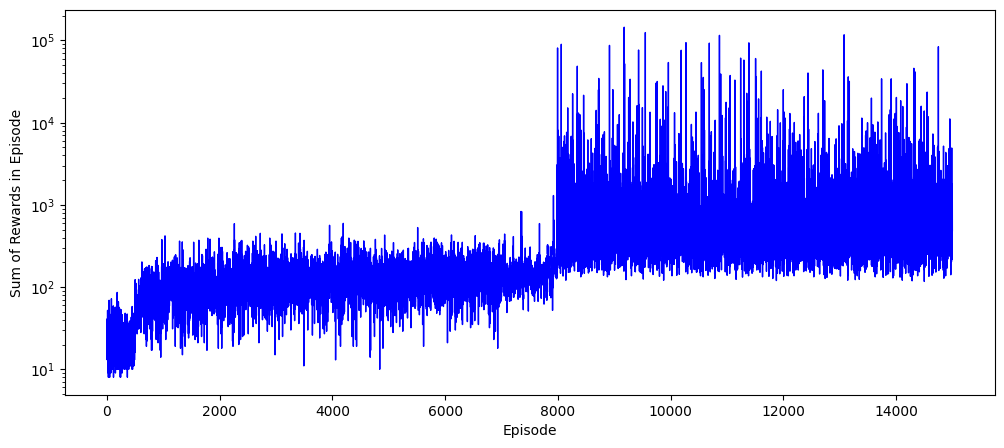

In [7]:
# 학습된 Q values를 바탕으로 simulation을 3회 수행하며 결과를 확인한다.
for i in range(3):
    obtainedRewardsOptimal = Q_learning.simulateLearnedStrategy()

# Episode별 Reward의 합을 Plotting.
# Reward의 Convergence를 보여준다.
plt.figure(figsize=(12,5))
plt.plot(Q_learning.sumRewardsEpisode, color='blue', linewidth=1)
plt.xlabel('Episode')
plt.ylabel('Sum of Rewards in Episode')
plt.yscale('log')
plt.savefig('convergence_q-learning.png')
plt.show()

# Result

학습을 진행한 후 simulation 결과를 바탕으로, Agent가 Cartpole을 Play하는 모습을 확인할 수 있다.  
Plotting된 그래프는 학습 과정에서 매 Episode 마다 얻은 전체 reward의 sum을 나타낸 것이다.  
Decaying-Epsilon Greedy를 사용하여 Q-Learning을 이어나가면, Reward는 위와 같이 점차 수렴하게 되므로  
우리는 Optimal Policy(Optimal Action Value Function을 선택하는 Policy)에 가까운 Suboptimal Policy를 얻게 된다고 보는 것이다.
  
(Decaying-Epsilon Greedy란, Epsilon Greedy를 사용하지만, Episode가 진행되면서 점차 epsilon 값을 줄여서  
처음에는 다양한 Policy를 학습하는 Exploration을 많이 하고, 갈수록 Optimization에 가까워지는 Exploitation을 수행하는 방식)  
